In [18]:
from sklearn.tree import DecisionTreeRegressor
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
path = kagglehub.dataset_download("wlwwwlw/bitcoin-pulse-market-trends-and-fear-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset


In [ ]:
# Menampilkan isi folder dataset untuk memastikan nama file yang benar
dataset_folder = '/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset'
for filename in os.listdir(dataset_folder):
    print(filename)

Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv
merged_fix_to_hour.csv


In [ ]:
file_path = os.path.join(dataset_folder,'Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv')

In [ ]:
# Membaca file CSV yang ditemukan
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())

             timestamp  BNB_USDT_1h_open  BNB_USDT_1h_high  BNB_USDT_1h_low  \
0  2023-04-09 00:00:00          310.5739          311.1801         310.4821   
1  2023-04-09 01:00:00          311.1801          311.6257         311.1489   
2  2023-04-09 02:00:00          311.6132          311.8623         311.2814   
3  2023-04-09 03:00:00          311.2814          311.4965         311.0072   
4  2023-04-09 04:00:00          311.2450          311.3736         311.0723   

   BNB_USDT_1h_close  BNB_USDT_1h_volume  BTC_USDT_1h_open  BTC_USDT_1h_high  \
0           311.1801              28.717          27943.39          28073.95   
1           311.6132              15.980          28035.04          28080.00   
2           311.2814              37.265          28075.72          28080.84   
3           311.2450              22.836          28033.86          28047.09   
4           311.1659              44.535          28025.87          28038.02   

   BTC_USDT_1h_low  BTC_USDT_1h_close  ...  

In [ ]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)

Index(['timestamp', 'BNB_USDT_1h_open', 'BNB_USDT_1h_high', 'BNB_USDT_1h_low',
       'BNB_USDT_1h_close', 'BNB_USDT_1h_volume', 'BTC_USDT_1h_open',
       'BTC_USDT_1h_high', 'BTC_USDT_1h_low', 'BTC_USDT_1h_close',
       'BTC_USDT_1h_volume', 'DOGE_USDT_1h_open', 'DOGE_USDT_1h_high',
       'DOGE_USDT_1h_low', 'DOGE_USDT_1h_close', 'DOGE_USDT_1h_volume',
       'ETH_USDT_1h_open', 'ETH_USDT_1h_high', 'ETH_USDT_1h_low',
       'ETH_USDT_1h_close', 'ETH_USDT_1h_volume', 'SOL_USDT_1h_open',
       'SOL_USDT_1h_high', 'SOL_USDT_1h_low', 'SOL_USDT_1h_close',
       'SOL_USDT_1h_volume', 'XRP_USDT_1h_open', 'XRP_USDT_1h_high',
       'XRP_USDT_1h_low', 'XRP_USDT_1h_close', 'XRP_USDT_1h_volume',
       'Close_ibovespa', 'High_ibovespa', 'Low_ibovespa', 'Open_ibovespa',
       'Volume_ibovespa', 'Close_ipc_mexico', 'High_ipc_mexico',
       'Low_ipc_mexico', 'Open_ipc_mexico', 'Volume_ipc_mexico', 'Close_dax',
       'High_dax', 'Low_dax', 'Open_dax', 'Volume_dax', 'Close_nasdaq',
       'Hi

In [ ]:
df = df.dropna(subset=['XRP_USDT_1h_open', 'XRP_USDT_1h_high', 'XRP_USDT_1h_low', 'XRP_USDT_1h_close'])

In [ ]:
x = df[['XRP_USDT_1h_open', 'XRP_USDT_1h_high', 'XRP_USDT_1h_low']]
y = df['XRP_USDT_1h_close']

In [ ]:
x

,XRP_USDT_1h_open,XRP_USDT_1h_high,XRP_USDT_1h_low
0,0.5051,0.5083,0.5047
1,0.5078,0.5092,0.5074
2,0.5078,0.5081,0.5067
3,0.5067,0.5070,0.5061
4,0.5062,0.5073,0.5061
...,...,...,...
17511,1.8924,1.9128,1.8442
17512,1.8745,1.8889,1.8375
17513,1.8416,1.9247,1.8412
17514,1.9137,1.9241,1.8885


In [ ]:
y

,XRP_USDT_1h_close
0,0.5078
1,0.5078
2,0.5067
3,0.5062
4,0.5069
...,...
17511,1.8745
17512,1.8416
17513,1.9137
17514,1.8909


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)

In [19]:
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 99.42%


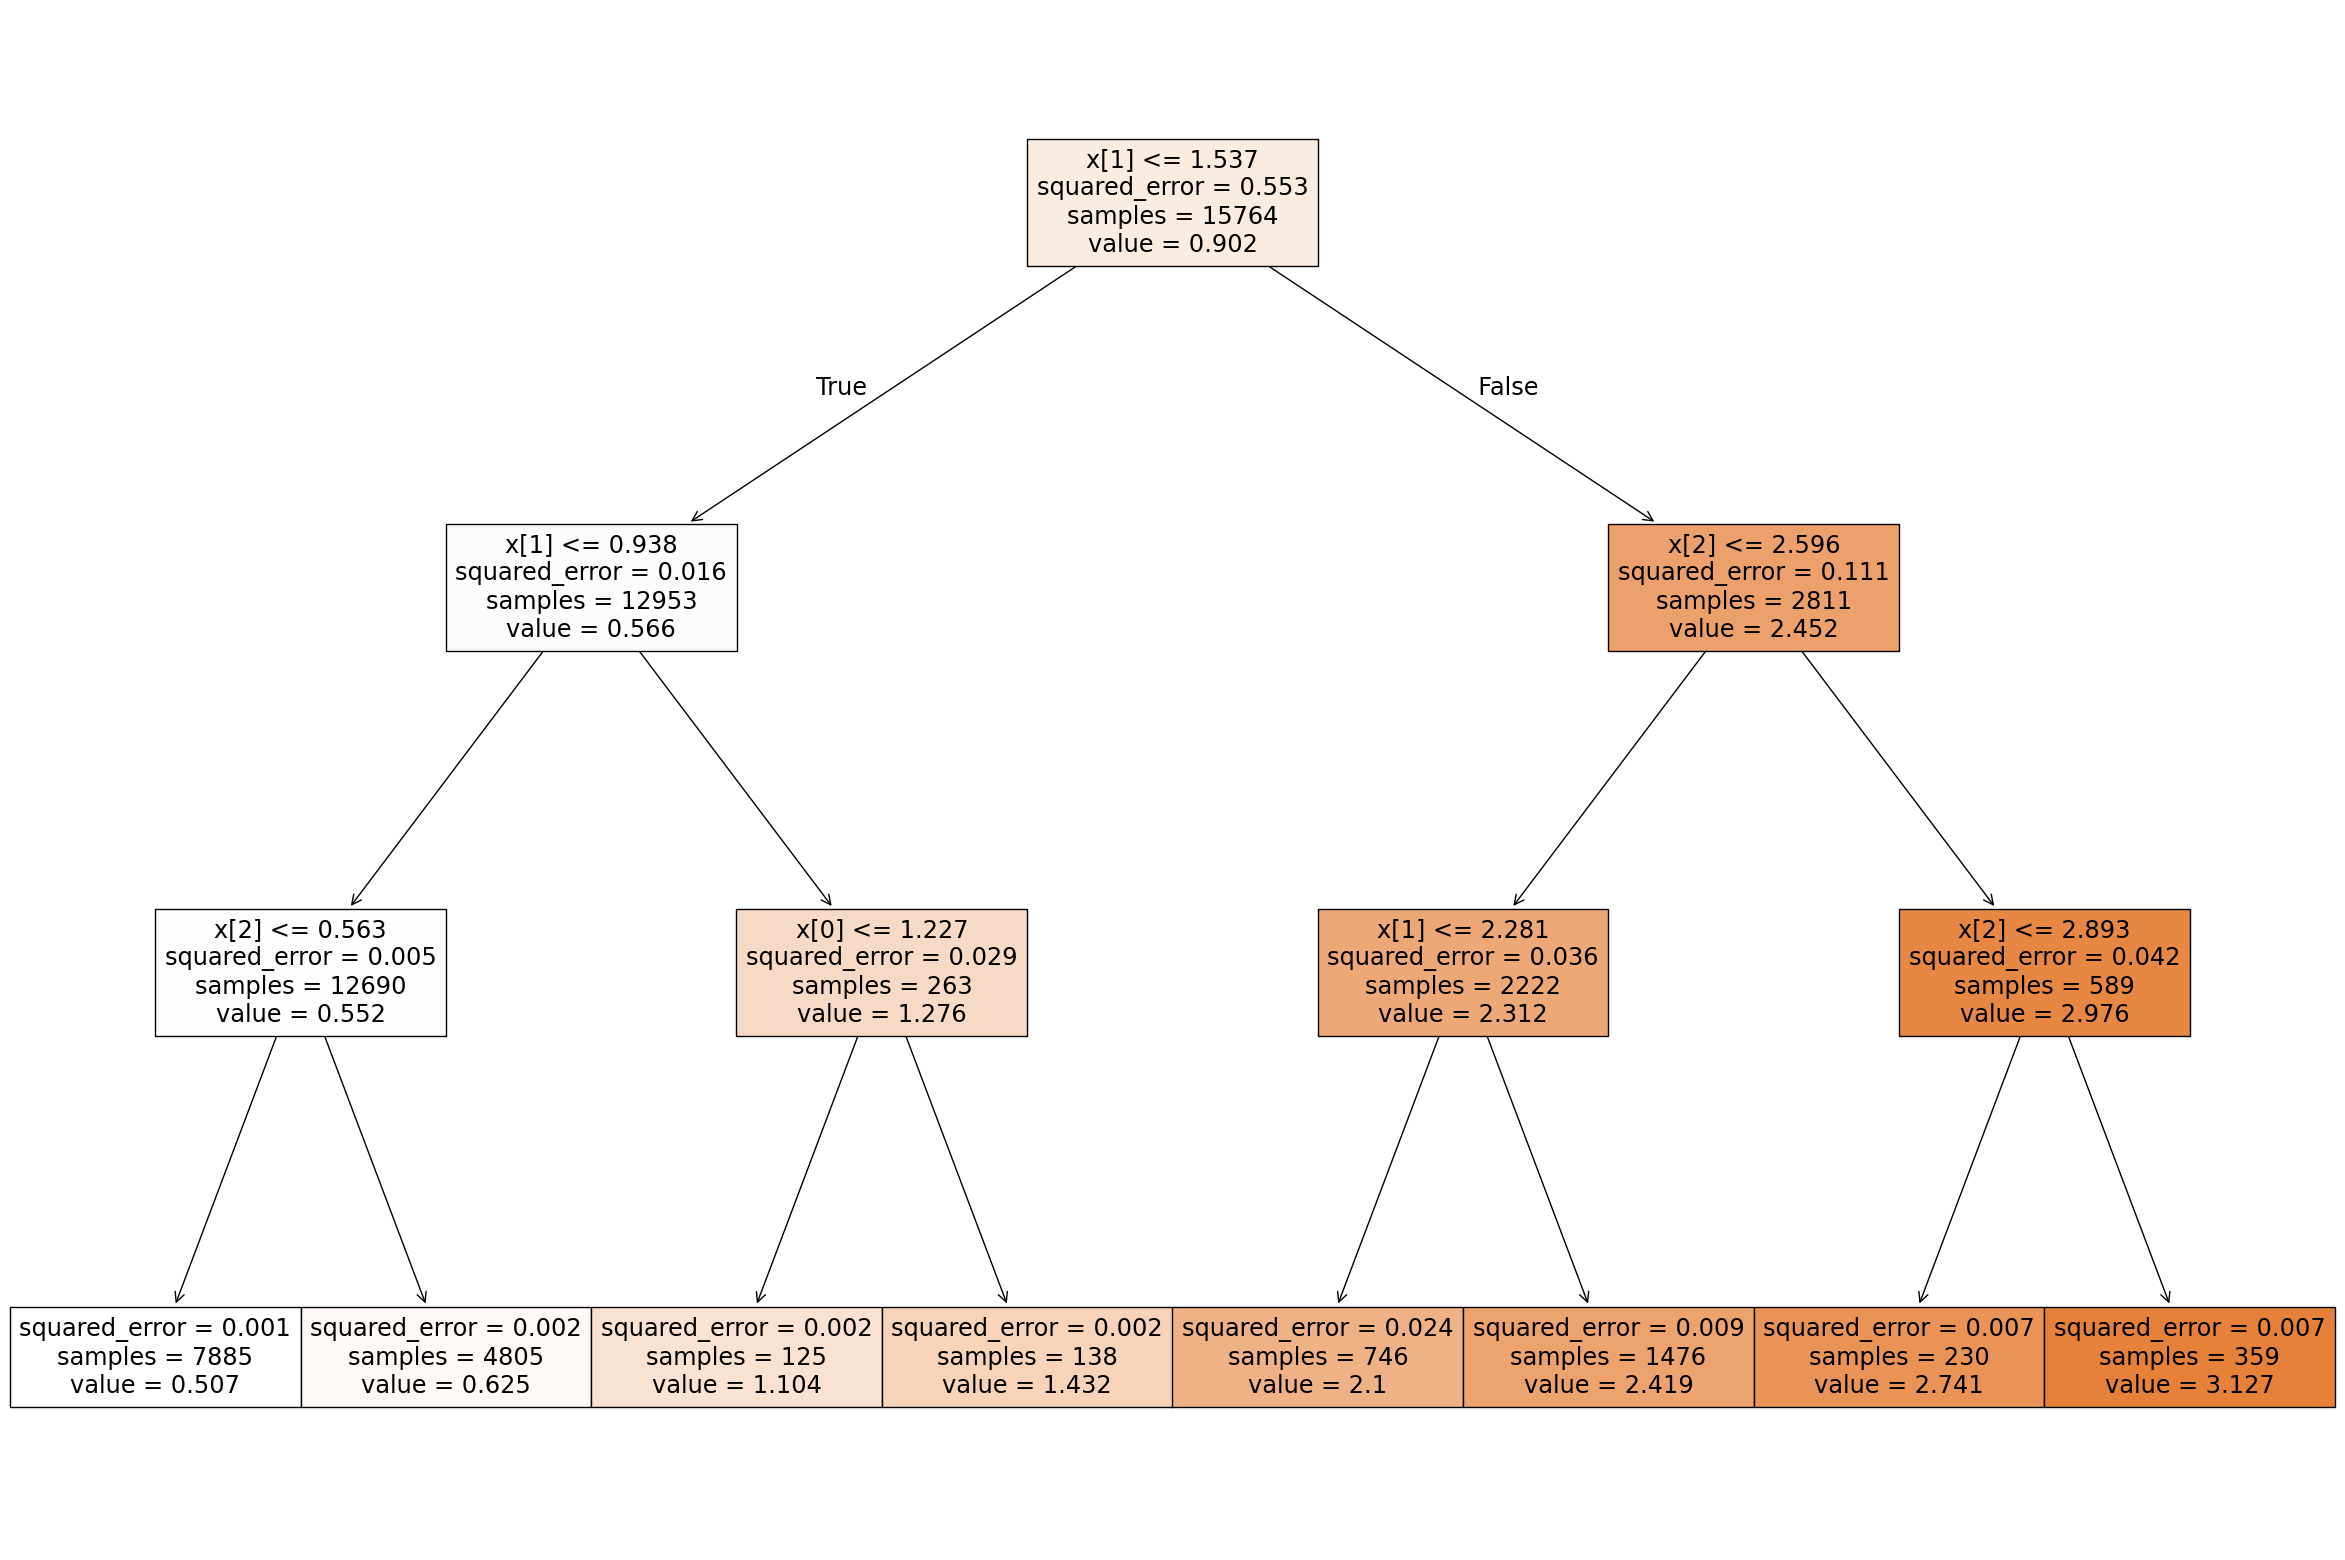

In [21]:
plt.figure(figsize=(30, 20))
plot_tree(dtree, filled=True)
plt.show()